In [ ]:
%pip install "ds @ git+https://github.com/knightzhang1314/ecommerce-test@v1.0.0"

In [1]:
from pathlib import Path
import sys
sys.path.insert(0, str(Path().resolve().parent.joinpath("src")))
from ds.core.platform import Platform
from ds.schema.order_items import OrderItemObject
from ds.schema.order_payments import OrderPaymentsObject
from ds.schema.orders import OrderObject
from ds.schema.product import ProductObject
from ds.schema.sales import SalesObject
from ds.service.sales_service import SalesService, LocalSalesService

from ds.ml import predict_sales 

In [2]:
sales = LocalSalesService().run()

C:\Bankup\Project\Github\ecommerce-test\src\ds\service\sales_service.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])


In [3]:
sales.df.head()

,product_id,order_purchase_timestamp,sales
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20,120.239998
1,00088930e925c41fd95ebfe695fd2655,2017-12-17,143.830002
2,0009406fd7479715e4bef61dd91f2462,2017-12-24,242.100006
3,000b8f95fcb9e0096488278317764d19,2018-08-05,78.500000
4,000b8f95fcb9e0096488278317764d19,2018-08-12,78.500000


In [5]:
sample_grouped_sales = predict_sales.resample(sales.df)

In [6]:
sample_grouped_sales.head()

product_id,00066f42aeeb9f3007548bb9d3f33c38,00088930e925c41fd95ebfe695fd2655,0009406fd7479715e4bef61dd91f2462,000b8f95fcb9e0096488278317764d19,000d9be29b5207b54e86aa1b1ac54872,0011c512eb256aa0dbbb544d8dffcf6e,00126f27c813603687e6ce486d909d01,001795ec6f1b187d37335e1c4704762e,001b237c0e9bb435f2e54071129237e9,001b72dfd63e9833e8c02742adf472e3,...,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff28f91211774864a1000f918ed00cc,fff515ea94dbf35d54d256b3e39f0fea,fff6177642830a9a94a0f2cba5e476d1,fff81cc3158d2725c0655ab9ba0f712c,fff9553ac224cec9d15d49f5a263411f,fffdb2d0ec8d6a61f0a0a0db3f25b441,fffe9eeff12fcbd74a2f2b007dde0c58
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_sample = predict_sales.train_sample(sample_grouped_sales)
train_set = next(train_sample)
test_set = next(train_sample)

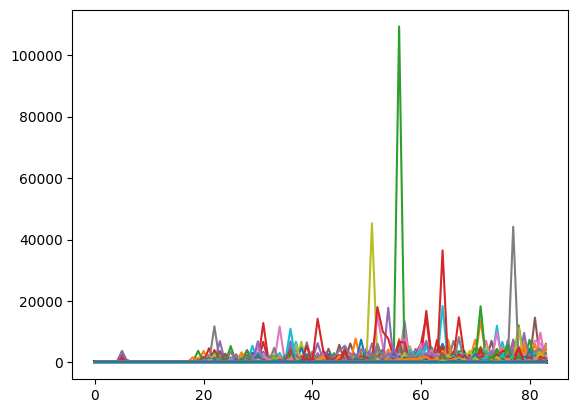

In [8]:
predict_sales.visualize_plt(train_set)

In [9]:
train_set

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 48.22,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]], dtype=float32)

In [10]:
import numpy as np
import statsmodels.api as sm

def train(train_set: np.ndarray):
    # convert multivariate data to univariate by taking the mean of each row
    train_set_uni = np.mean(train_set, axis=1)
    
    # ARIMA Model
    model_arima = sm.tsa.ARIMA(train_set_uni, order=(5,1,0))
    model_arima_fit = model_arima.fit()

    # Exponential Smoothing Model
    model_es = sm.tsa.ExponentialSmoothing(train_set_uni)
    model_es_fit = model_es.fit()
    
    yield model_arima_fit
    yield model_es_fit

In [11]:
train_result = train(train_set)
model_arima_fit = next(train_result)
model_es_fit = next(train_result)

In [13]:
import pandas as pd
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMAResultsWrapper
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters.results import HoltWintersResultsWrapper

from sklearn.metrics import mean_squared_error

def predict(
    grouped_sales: pd.DataFrame,
    model_arima_fit: ARIMAResultsWrapper,
    model_es_fit: HoltWintersResultsWrapper,
    train_set: np.ndarray,
    test_set: np.ndarray,
) -> None:
    # forecast using the ARIMA model
    # print(len(test_set))
    arima_predicted = model_arima_fit.forecast(steps=len(test_set))
    print(arima_predicted[:14])
    # calculate the mean squared error using the first variable in test_set as the target variable
    arima_mse = mean_squared_error(test_set[:, 0], arima_predicted)

    # Exponential Smoothing Prediction
    es_predicted = model_es_fit.predict(
        start=len(train_set), end=len(grouped_sales) - 1
    )

    # calculate the mean squared error using the first variable in test_set as the target variable
    es_mse = mean_squared_error(test_set[:, 0], es_predicted)

    # print("ARIMA Mean Squared Error:", arima_mse)
    # print("Exponential Smoothing Mean Squared Error:", es_mse)

predict(sample_grouped_sales, model_arima_fit, model_es_fit, train_set, test_set)

[10.58271153 10.46347255 10.33884391 10.42460266 10.09822598 10.15181321
 10.28267877 10.29771869 10.32231971 10.35317587 10.27287437 10.24745024
 10.26197174 10.26527068]
